In [8]:
import pandas as pd
from pyannote.core import Annotation, Segment
from pyannote.metrics.diarization import DiarizationErrorRate
metric = DiarizationErrorRate()

In [2]:
def convert_rttm_to_diarization(rttm_file, offset):
    
    # Read RTTM file into pandas DataFrame
    rttm_df = pd.read_csv(rttm_file, sep=' ', header=None,
                      names=['temp', 'file_name', 'channel', 'start', 'duration', 'NA_1', 'NA_2', 'speaker_label', 'NA_3', 'NA_4'])
    
    rttm_df.sort_values(by="start", inplace=True)

    diarize_dict = {}

    # Iterate over RTTM rows and add segments to Pyannote annotation
    for _, row in rttm_df.iterrows():
        start_time = round(row['start'] - offset, 2)
        end_time = round(start_time + row['duration'], 2)
        label = row['speaker_label']
        if label not in diarize_dict.keys():
            diarize_dict[label] = [(start_time, end_time)]
        else:
            diarize_dict[label].append((start_time, end_time))

    return diarize_dict

def convert_diarization_output_to_pyannote(diarize_output):
    annotation = Annotation()
    
    for speaker, timelines in diarize_output.items():
        for timeline_start, timeline_end in timelines:
            annotation[Segment(timeline_start, timeline_end)] = speaker

    return annotation

def convert_pyannote_to_diarization(pyannote_output):
    
    diarize_dict = {}
    for duration,_, speaker_key in pyannote_output.itertracks(yield_label=True):
        start_time = round(duration.start, 2)
        end_time = round(duration.end, 2)
        if speaker_key in diarize_dict.keys():
            diarize_dict[speaker_key].append((start_time,end_time))
        else:
            diarize_dict[speaker_key] = [(start_time,end_time)]
            
    return diarize_dict

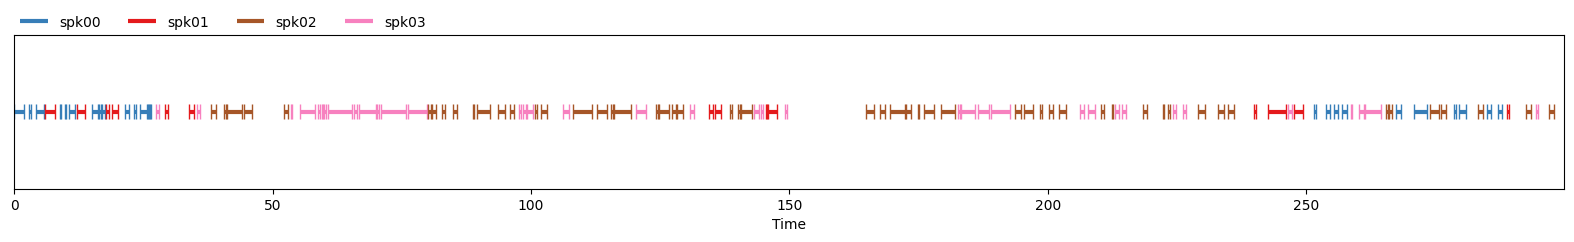

In [15]:
pyannote_gt = convert_diarization_output_to_pyannote(
    convert_rttm_to_diarization(
        "/home/sunil/projects/Stuff/Combined/AVA-AVD/dataset/rttms/2qQs3Y9OJX0_c_03.rttm", 1500.002))
pyannote_gt

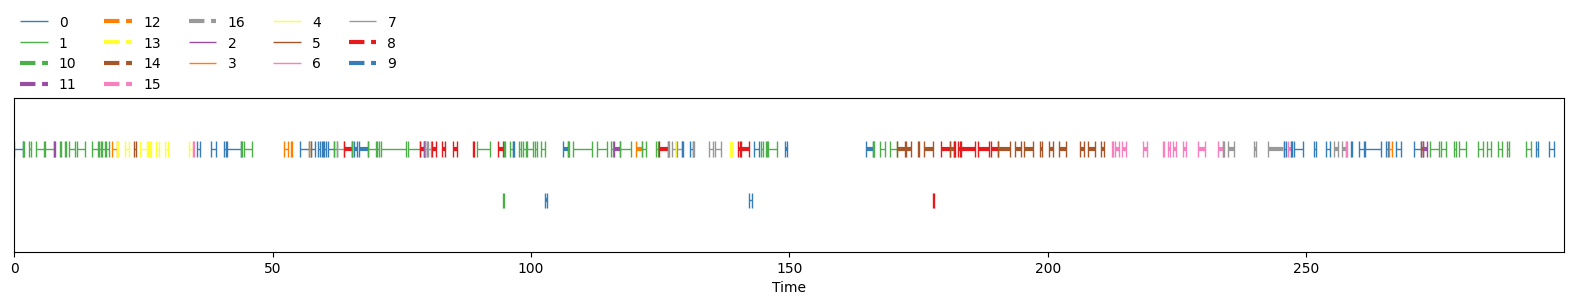

In [16]:
pyannote_pred = convert_diarization_output_to_pyannote(
    convert_rttm_to_diarization(
        "/home/sunil/projects/Stuff/Combined/AVA-AVD/save/token/avaavd/rttms/2qQs3Y9OJX0_c_03.rttm", 1500.002))
pyannote_pred

In [17]:
metric(pyannote_gt, pyannote_pred)

/home/sunil/projects/Stuff/Combined/venv/lib/python3.8/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(


0.7291412291412293

In [29]:
import pickle
temp = pickle.load(open("../../output/run_output/final_diarization_output_MY_DATASET.pckl", "rb"))
for speaker, intervals in temp["MagnusCarlson_542_599"]["audio_03"].items():
    for interval in intervals:
        print(f"{interval[0]} {interval[1]} speech")

0.01 1.2 speech
1.47 9.16 speech
11.88 16.32 speech
17.31 19.57 speech
19.84 21.83 speech
26.39 27.65 speech
33.17 37.22 speech
37.78 38.4 speech
39.48 39.74 speech
39.97 39.99 speech
40.3 40.38 speech
40.5 40.6 speech
41.38 41.4 speech
48.36 49.07 speech
51.94 56.99 speech
16.7 17.31 speech
21.77 26.14 speech
27.84 30.91 speech
31.11 33.05 speech
39.74 39.97 speech
39.99 40.3 speech
40.6 41.38 speech
41.4 43.86 speech
44.22 48.17 speech
48.33 48.36 speech
51.04 51.89 speech
55.73 56.32 speech


In [30]:
import pandas as pd

In [31]:
df = pd.read_excel("../../Dataset/All_Transcriptions_WithSpeakers.xlsx")
df

,file_name,segment_id,segment_text,segment_start,segment_end,word,word_start,word_end,speaker
0,MagnusCarlson_542_599.mp4,0,I'm going to name a sport.,0.0,0.94,I'm,0.00,0.18,Levy Rozman
1,MagnusCarlson_542_599.mp4,0,I'm going to name a sport.,0.0,0.94,going,0.18,0.28,Levy Rozman
2,MagnusCarlson_542_599.mp4,0,I'm going to name a sport.,0.0,0.94,to,0.28,0.36,Levy Rozman
3,MagnusCarlson_542_599.mp4,0,I'm going to name a sport.,0.0,0.94,name,0.36,0.46,Levy Rozman
4,MagnusCarlson_542_599.mp4,0,I'm going to name a sport.,0.0,0.94,a,0.46,0.66,Levy Rozman
...,...,...,...,...,...,...,...,...,...
12444,StarTalk_Questions_831_5_924.mp4,37,"Yeah, there's something called subspace where ...",88.6,91.62,they,90.04,90.22,Neil deGrasse Tyson
12445,StarTalk_Questions_831_5_924.mp4,37,"Yeah, there's something called subspace where ...",88.6,91.62,can,90.22,90.36,Neil deGrasse Tyson
12446,StarTalk_Questions_831_5_924.mp4,37,"Yeah, there's something called subspace where ...",88.6,91.62,communicate,90.48,90.70,Neil deGrasse Tyson
12447,StarTalk_Questions_831_5_924.mp4,37,"Yeah, there's something called subspace where ...",88.6,91.62,basically,90.70,91.14,Neil deGrasse Tyson


In [34]:
df[df["file_name"] == "MagnusCarlson_542_599.mp4"]

,file_name,segment_id,segment_text,segment_start,segment_end,word,word_start,word_end,speaker
0,MagnusCarlson_542_599.mp4,0,I'm going to name a sport.,0.00,0.94,I'm,0.00,0.18,Levy Rozman
1,MagnusCarlson_542_599.mp4,0,I'm going to name a sport.,0.00,0.94,going,0.18,0.28,Levy Rozman
2,MagnusCarlson_542_599.mp4,0,I'm going to name a sport.,0.00,0.94,to,0.28,0.36,Levy Rozman
3,MagnusCarlson_542_599.mp4,0,I'm going to name a sport.,0.00,0.94,name,0.36,0.46,Levy Rozman
4,MagnusCarlson_542_599.mp4,0,I'm going to name a sport.,0.00,0.94,a,0.46,0.66,Levy Rozman
...,...,...,...,...,...,...,...,...,...
153,MagnusCarlson_542_599.mp4,37,what would it be?,55.32,55.68,it,55.42,55.50,Levy Rozman
154,MagnusCarlson_542_599.mp4,37,what would it be?,55.32,55.68,be?,55.50,55.68,Levy Rozman
155,MagnusCarlson_542_599.mp4,38,"Yeah, soccer.",55.96,56.22,"Yeah,",55.96,55.96,Magnus Carlson
156,MagnusCarlson_542_599.mp4,38,"Yeah, soccer.",55.96,56.22,soccer.,56.06,56.22,Magnus Carlson


In [1]:
import pickle

In [2]:
tracks = pickle.load(open("../../output/video_temp/MagnusCarlson_542_599/pywork/tracks.pckl", "rb"))
tracks

[{'track': {'frame': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
          17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
          34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
          51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
          68, 69, 70, 71, 72]),
   'bbox': array([[1207.9543457 ,  282.93304443, 1470.7833252 ,  650.81115723],
          [1207.9543457 ,  282.93304443, 1470.7833252 ,  650.81115723],
          [1206.1126709 ,  286.18508911, 1469.13110352,  654.01708984],
          [1206.1126709 ,  286.18508911, 1469.13110352,  654.01708984],
          [1205.59301758,  292.69274902, 1469.75231934,  659.11968994],
          [1206.39697266,  299.05984497, 1467.89331055,  662.37182617],
          [1205.63183594,  301.21582031, 1467.54211426,  664.02398682],
          [1204.83374023,  300.62722778, 1465.96801758,  664.90771484],
          [1203.8371582 ,  298.97332764, 1463.23791504

In [3]:
scores = pickle.load(open("../../output/video_temp/MagnusCarlson_542_599/pywork/scores.pckl", "rb"))
scores

[array([-0.30000001, -0.2       , -0.30000001,  0.1       ,  0.69999999,
         0.89999998,  0.89999998,  1.20000005,  1.5       ,  1.70000005,
         1.5       ,  1.70000005,  1.79999995,  2.20000005,  1.89999998,
         1.79999995,  1.70000005,  1.89999998,  1.70000005,  1.60000002,
         1.5       ,  1.39999998,  1.5       ,  1.5       ,  1.29999995,
         0.89999998,  0.60000002,  0.40000001,  0.2       ,  0.2       ,
         0.30000001,  0.2       ,  0.2       ,  0.2       ,  0.30000001,
         0.1       ,  0.30000001,  0.40000001,  1.20000005,  2.0999999 ,
         2.4000001 ,  2.20000005,  2.0999999 ,  1.79999995,  1.20000005,
         1.39999998,  1.5       ,  1.60000002,  1.5       ,  1.39999998,
         1.70000005,  1.39999998,  1.29999995,  1.89999998,  2.29999995,
         2.4000001 ,  2.4000001 ,  2.        ,  1.60000002,  1.5       ,
         2.        ,  2.0999999 ,  2.20000005,  1.29999995,  1.5       ,
         1.60000002,  1.5       ,  1.60000002,  2.0

In [7]:
for idx, score in enumerate(scores):
    print(tracks[idx])
    print(scores[idx])

{'track': {'frame': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72]), 'bbox': array([[1207.9543457 ,  282.93304443, 1470.7833252 ,  650.81115723],
       [1207.9543457 ,  282.93304443, 1470.7833252 ,  650.81115723],
       [1206.1126709 ,  286.18508911, 1469.13110352,  654.01708984],
       [1206.1126709 ,  286.18508911, 1469.13110352,  654.01708984],
       [1205.59301758,  292.69274902, 1469.75231934,  659.11968994],
       [1206.39697266,  299.05984497, 1467.89331055,  662.37182617],
       [1205.63183594,  301.21582031, 1467.54211426,  664.02398682],
       [1204.83374023,  300.62722778, 1465.96801758,  664.90771484],
       [1203.8371582 ,  298.97332764, 1463.23791504,  665.0012207 ],
       [1201.84899902,